In [1]:
from IPython.display import SVG, display

En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

In [2]:
file_path = "farmers-protest-tweets-2021-2-4.json"

Para todas las respustas se va a considerar que m es el número de tweets.

### Question 1

Como se menciona anteriormente, $m$ representa el número de tweets y, en este caso, $n$ es la cantidad de fechas únicas.

#### Time

- La manera de enfrentar el problema para hacerlo eficiente en tiempo fue primero crear un diccionario con las fechas y un contador de cuantas veces aparecen en el listado. Esto tiene una complejidad de $O(m)$. En esta parte también se guarda en diccionarios el registro del usuario más activo por fecha.
- Luego se revisa para cada fecha, si el está =entre las más populares o no. Para esto se utilizó la libreria heapq con la que se creó un `min-heap` ya que estos tienen complejidad de $log(x)$ (donde x es el tamaño del heap, 10 en este caso) para insertar y reemplazar y $O(1)$ para obtener el dato menor. 
- La segunda parte de la solución tiene una complejidad de tiempo de $O(nlog(10))$.
- En total, la solución tiene una complejidad de $O(m + nlog10)$ 
- Otra opción que se consideró para la solución fue juntar ambos loops, lo que resultaría en una complejidad de $O(mlog10)$, pero como $m >> n$, esto tomaría mucho más tiempo.

In [3]:
from q1_time import q1_time

q1_time(file_path)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

Como se puede ver en la siguiente imagen, los tiempos de ejecución de la función está principalmente en `group_by_date`, mientras que `popular_dates` ocupa un porcentaje muy pequeño. Confirmando así que si $m >> n$, conviene la opción elegida antes que hacer todo e un loop.

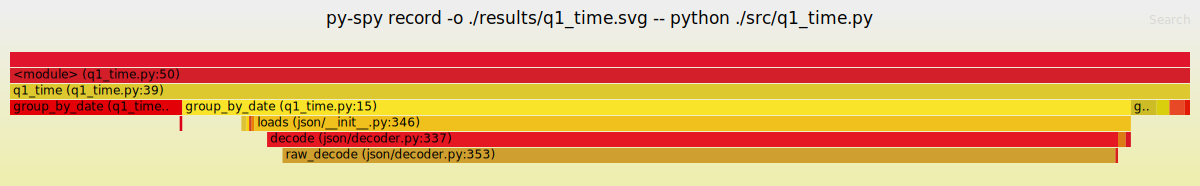

In [4]:
display(SVG(data='../results/q1_time.svg'))